# Imports

In [826]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random

from source.filter_logic import FirstDegreeFilter, SecondDegreeFilter, FilterBuilder, FilterDirector
from source.signal_logic import SignalCollection, SignalProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization

In [ ]:
first_degree_filter = FirstDegreeFilter()
second_degree_filter = SecondDegreeFilter()

In [ ]:
x, clean_y, noised_y = SignalCollection.sine()
# x, clean_y, noised_y = SignalCollection.triangular(width=150, period=300)
# x, clean_y, noised_y = SignalCollection.rectangular()
# x, clean_y, noised_y = SignalCollection.stairs()

In [ ]:
plt.plot(clean_y, linewidth=2)
plt.scatter(range(len(noised_y)), noised_y, c='tan')

# Filter training

## First degree filter

In [ ]:
train_filtered = first_degree_filter.train(clean_y, noised_y)
first_degree_filter.w

In [ ]:
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.plot(clean_y, linewidth=2)
plt.plot(train_filtered, linewidth=2, c='red')

## Second degree filter

In [ ]:
train_filtered = second_degree_filter.train(clean_y, noised_y)
second_degree_filter.w

In [ ]:
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.plot(clean_y, linewidth=2)
plt.plot(train_filtered, linewidth=2, c='red')

# Filter inference

## First degree filter

In [ ]:
predict_filtered = first_degree_filter.predict(noised_y)
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.plot(clean_y, linewidth=2)
plt.plot(predict_filtered, linewidth=2, c='red')

In [ ]:
impulse = x * 0
impulse[0] = 1

In [ ]:
predict_filtered = first_degree_filter.predict(impulse)
plt.scatter(range(len(impulse[:50])), impulse[:50], c='orange')
plt.grid()
plt.plot(predict_filtered[:50])

In [ ]:
x = np.linspace(0, 20, 1000)
first_amplitude_list = list()
for frequency in range(1, 25000, 20):
  _, _, noised_y = SignalCollection.sine(frequency/1000)
  predict_filtered = first_degree_filter.predict(noised_y)
  square_sum = sum([value ** 2 for value in predict_filtered])
  first_amplitude_list.append((square_sum/len(predict_filtered)) ** .5)

In [ ]:
plt.grid()
plt.plot(first_amplitude_list)

## Second degree filter

In [ ]:
predict_filtered = second_degree_filter.predict(noised_y)
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.plot(clean_y, linewidth=2)
plt.plot(predict_filtered, linewidth=2, c='red')

In [ ]:
impulse = x * 0
impulse[0] = 1

In [ ]:
predict_filtered = second_degree_filter.predict(impulse)
plt.scatter(range(len(impulse[:50])), impulse[:50], c='orange')
plt.grid()
plt.plot(predict_filtered[:50])

In [ ]:
x = np.linspace(0, 20, 1000)
second_amplitude_list = list()
for frequency in range(1, 25000, 10):
  _, _, noised_y = SignalCollection.sine(frequency/1000)
  predict_filtered = second_degree_filter.predict(noised_y)
  square_sum = sum([value ** 2 for value in predict_filtered])
  second_amplitude_list.append((square_sum/len(predict_filtered)) ** .5)

In [ ]:
plt.grid()
plt.plot(first_amplitude_list)

In [ ]:
plt.grid()
plt.plot(second_amplitude_list)

# Experiments

In [967]:
processor = SignalProcessor()
signal_collection = SignalCollection()

In [968]:
filter_builder = FilterBuilder()
filter_director = FilterDirector()

In [1010]:
filter = filter_builder.get_new_filter(learning_rate=0.02)
filter = filter_builder.add_weight(filter, 'in', 0.1)
filter = filter_builder.add_weight(filter, 'out', 0.1)
filter = filter_builder.add_weight(filter, 'out', 0.1)
filter.weights

{'in': [{'status': True, 'value': 0.1}],
 'out': [{'status': True, 'value': 0.1}, {'status': True, 'value': 0.1}]}

In [985]:
x, y = processor.get_empty(n_points=10000, end=25)
# clean_y = processor.add_sine(x, y, frequency=10, amplitude=0.4)
clean_y = processor.add_sine(x, y, frequency=15)
noised_y = clean_y
noised_y = processor.add_sine(x, noised_y, frequency=0.1, phase=1)
# noised_y = processor.add_sine(x, noised_y, frequency=10, amplitude=0.4)
# noised_y = processor.add_sine(x, noised_y, frequency=.4)
# noised_y = processor.add_sine(x, noised_y, frequency=100, amplitude=0.2)
noised_y = processor.add_noise(x, noised_y, amplitude=1)

In [986]:
x, clean_y, noised_y = signal_collection.sine()

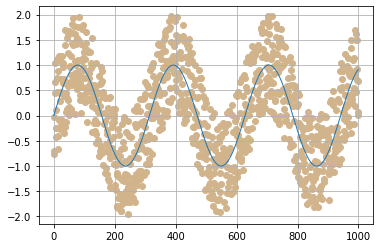

In [987]:
plt.plot(clean_y, linewidth=1)
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.grid()


In [1006]:
train_filtered = filter.train(clean_y, predict_filtered)
filter.weights

{'in': [{'status': True, 'value': 0.2327783197245684}],
 'out': [{'status': True, 'value': 0.6509568131823272}]}

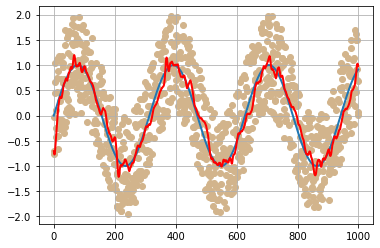

In [1007]:
plt.scatter(range(len(noised_y)), noised_y, c='tan')
plt.plot(clean_y, linewidth=2)
plt.plot(train_filtered, linewidth=2, c='red')
plt.grid()

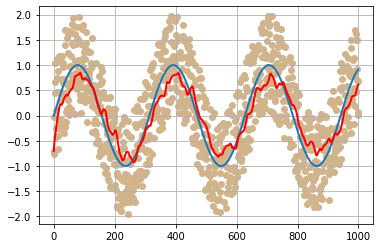

In [1009]:
predict_filtered = filter.predict(predict_filtered)
index = 1000
# plt.figure(figsize=(12,8))
plt.scatter(range(index), noised_y[:index], c='tan')
plt.plot(clean_y[:index], linewidth=2)
plt.plot(predict_filtered[:index], linewidth=2, c='red')
plt.grid()


In [976]:
# x = np.linspace(0, 20, 1000)
# first_amplitude_list = list()
# for frequency in range(1, 25000, 20):
#   _, _, noised_y = SignalCollection.sine(frequency/1000)
#   predict_filtered = second_degree_filter.predict(noised_y)
#   square_sum = sum([value ** 2 for value in predict_filtered])
#   first_amplitude_list.append((square_sum/len(predict_filtered)) ** .5)

In [ ]:
plt.grid()
plt.plot(first_amplitude_list)

In [ ]:
from source.analysis_utils import get_snr, get_normalized_snr

In [ ]:
get_snr(clean_y, noised_y)

In [ ]:
get_snr(clean_y, predict_filtered)

In [ ]:
get_normalized_snr(clean_y, noised_y, splits=10)

In [ ]:
get_normalized_snr(clean_y, predict_filtered, splits=10)